In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [2]:
# Import statements
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# Display options
pd.set_option('display.max_columns', None)

In [3]:
hr_employee = pd.read_csv( './Data/HR_Employee.csv', delimiter = ",")
Attrition = pd.read_csv( './Data/Attrition.csv', delimiter = ",")

In [4]:
X = hr_employee
# Y = Attrition.values.ravel()
Y = Attrition

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1176, 69) (1176, 1)
(294, 69) (294, 1)


#### Functions

In [6]:

from sklearn import metrics
from sklearn.model_selection import GridSearchCV
# Function:    gridSearcBestEstimator
# Input:       Classifier, parameters, cross validation
# Output:      Prints Best Estimator
# Returns:     Best Estimator
def gridSearcBestEstimator(model, params, cv):
    clf = model 
    gs = GridSearchCV(estimator=clf, param_grid=params, scoring='f1', cv=cv, n_jobs=-1, )

    gs.fit(X_train, y_train.values.ravel())
    best_estimator = gs.best_estimator_
    
    print('Best Estimator:')
    print(best_estimator,'\n')
    
    #if model == DecisionTreeClassifier():
    #    best_estimator.get_depth()

    return best_estimator

In [7]:
# Function:    fitModel
# Input:       Classifier
# Returns:     Fitted Model
def fitModel(model):
    clf = model
    clf.fit(X_train, y_train.values.ravel())
    
    return clf

In [8]:
from sklearn.metrics import accuracy_score
# Function:    modelAccuracy
# Input:       Classifier with Best Estimator
# Output:      Prints Training & Testing Accuracy
# Returns:     Y Test Predictions
def modelAccuracy(model):
    clf = model
    
    # Make Train predictions
    y_train_pred = clf.predict(X_train)
    # Calculate accuracy score
    training_accuracy = accuracy_score(y_train, y_train_pred)
    print('Training Accuracy: ',training_accuracy)
    # confusionMatrixMetrics(y_train, y_pred)

    # Make Test predictions
    y_test_pred = clf.predict(X_test)
    # Calculate accuracy scores
    testing_accuracy = accuracy_score(y_test, y_test_pred)
    print('Testing Accuracy:  ',testing_accuracy)
    
    return y_test_pred

In [9]:
from sklearn.metrics import confusion_matrix
# Function:    confusionMatrix
# Input:       Training/Testing dataframe and predictions
# Output:      Prints Formatted Confusion Matrix
# Returns:     Confusion Matrix Array
# URL:         https://towardsdatascience.com/evaluating-machine-learning-classification-problems-in-python-5-1-metrics-that-matter-792c6faddf5
def confusionMatrix(true_test_train, pred):
    true = true_test_train
    
    cm = confusion_matrix(true, pred.round(), normalize=None)

    # Assigning columns names
    cm_df = pd.DataFrame(cm, 
                        columns = ['Predicted Negative', 'Predicted Positive'],
                        index = ['Actual Negative', 'Actual Positive'])
    
    # Printing Formatted Confusion Matrix
    print('\n',cm_df)
    
    return cm

In [10]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
# Function:    metrics
# Input:       confusion matrix array, true class values, predicted class values
# Output:      Prints Recall, Sensitivity, Precision, False Positive Rate, Balanced Accuracy & F1 Scores
def metrics(cm, true, pred):
    # Assign values from the confusion matrix to manually 
    # calculate Specificity and False Positive Rate 
    TP = cm[1][1]
    TN = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]

    # Recall
    recall = recall_score(true, pred)
    print('\nRecall:                  ', recall)
    # Sensitivity
    sensitivity = recall
    # Specificity
    specificity = (TN / float(TN + FP))
    print('Specificity:             ', specificity)
    # Precision
    precision = precision_score(true, pred)
    print('Precision:               ', precision)
    # False Positive Rate
    # fpr = (FP / float(TN + FP))
    # print ('False Positive Rate:     ', fpr)
    # Balanced Accuracy
    balanced_accuracy = (sensitivity + specificity)/2
    #balance_accuracy = metrics.balanced_accuracy_score(y_true, y_pred)
    print('Balanced Accuracy:       ', balanced_accuracy)
    # F1 Score Method 1: sklearn
    F1 = f1_score(true, pred)
    print('F1-Score:                ', F1)
    
    #return recall, specificity, precision, balanced_accuracy, F1, cm_df

### Decision Tree Pre-processing
Scale Data

In [11]:
scaler = MinMaxScaler(feature_range = (0,1))

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Performance on default decision tree model

In [12]:
# Fit Model to Default Classifier
dt_clf = fitModel(DecisionTreeClassifier())

# Calcualate Training and Testing Accuracy
y_test_pred = modelAccuracy(dt_clf)

# Print Confusion Matrix
cm = confusionMatrix(y_test, y_test_pred)

# Print Metrics
metrics(cm, y_test, y_test_pred)

Training Accuracy:  1.0
Testing Accuracy:   0.7619047619047619

                  Predicted Negative  Predicted Positive
Actual Negative                 210                  48
Actual Positive                  22                  14

Recall:                   0.3888888888888889
Specificity:              0.813953488372093
Precision:                0.22580645161290322
Balanced Accuracy:        0.601421188630491
F1-Score:                 0.2857142857142857


#### Confusion Matrix for default model

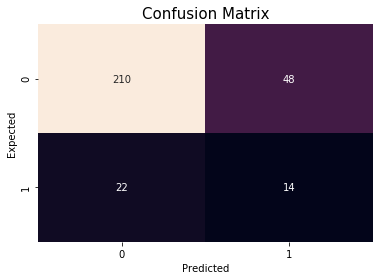

In [13]:
# Confusion Matrix
cm_plot =  pd.crosstab(index=y_test.values.ravel(), columns=y_test_pred, rownames=['Expected'], colnames=['Predicted'])
sns.heatmap(cm_plot, annot=True, square=False, fmt='', cbar=False)
plt.title("Confusion Matrix", fontsize = 15)
plt.show()

### Cross Validation Setup

In [14]:
# Cross Validate
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

### GridSearch CV Decision Tree

In [15]:
# Determine Best Estimator
params = dict(
    min_samples_split = [5, 10, 20, 30, 40, 50],
    max_depth = [1,2,3,None],
    ccp_alpha = [0.0, 0.010, 0.015, 0.020, 0.025]
)

# best_estimator = GridSearchCV(lr_clf, params,cv=10)
best_estimator = gridSearcBestEstimator(DecisionTreeClassifier(), params, cv)

# # Fit Model to best_estimator
dt_clf = fitModel(best_estimator)

# Calcualate Training and Testing Accuracy
y_test_pred = modelAccuracy(dt_clf)

# Print Confusion Matrix
cm = confusionMatrix(y_test, y_test_pred)

# Print Metrics
metrics(cm, y_test, y_test_pred)

Best Estimator:
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') 

Training Accuracy:  0.9438775510204082
Testing Accuracy:   0.7891156462585034

                  Predicted Negative  Predicted Positive
Actual Negative                 218                  40
Actual Positive                  22                  14

Recall:                   0.3888888888888889
Specificity:              0.8449612403100775
Precision:                0.25925925925925924
Balanced Accuracy:        0.6169250645994832
F1-Score:                 0.3111111111111111


### Confusion Matrix for Best Estimator

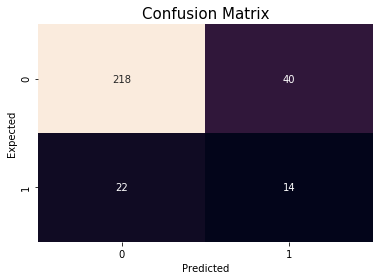

In [16]:
# Confusion Matrix
cm_plot =  pd.crosstab(index=y_test.values.ravel(), columns=y_test_pred, rownames=['Expected'], colnames=['Predicted'])
sns.heatmap(cm_plot, annot=True, square=False, fmt='', cbar=False)
plt.title("Confusion Matrix", fontsize = 15)
plt.show()

### Visualize best estimator

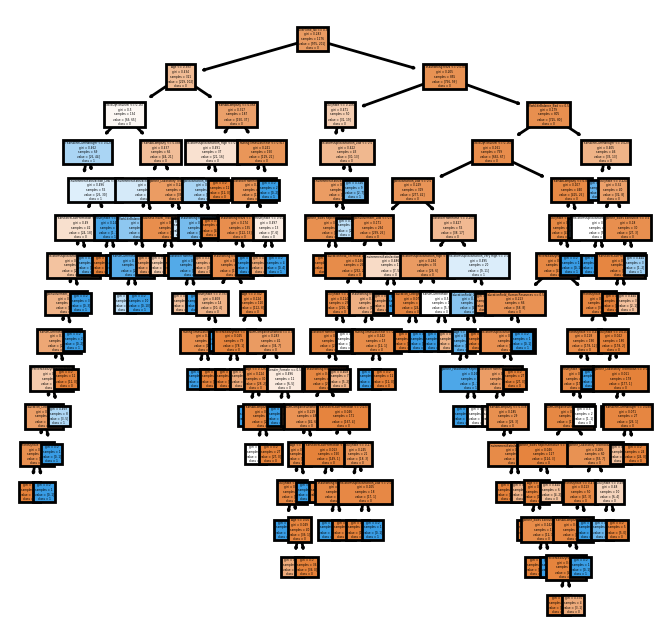

In [17]:
#Visualize decision tree
hr_employee_df = pd.DataFrame(data=hr_employee)
fn=hr_employee_df.columns
cn=['0','1']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=200)
tree.plot_tree(best_estimator,
               feature_names = fn, 
               class_names=cn,
               filled = True);

### Observations
The base decision tree model overfit the training data with default parameters. Training accuracy was 100% and testing accuracy was 75%. Through grid search, the model reduced bias on the model and improved overall performance. The best model chosen performed at training accuracy of 88% and testing accuracy of 80%.

# Performing Decision Tree on Selected Features

### In order to analyze if attrition is caused by things companies can control vs. cannot control, this section will look at subsets of features that are determined by the company (e.g. salary, training times, stock option level) to see which company-controlled attributes potentially lead to attrition. The decision tree will classify employees on likelihood to leave based on company controlled features.

In [63]:
hr_employee_attrition = pd.read_csv( "./Data/WA_Fn-UseC_-HR-Employee-Attrition.csv", delimiter = ",")
hr_employee_attrition['Attrition'] = hr_employee_attrition.Attrition.map(dict(Yes=1, No=0))

In [64]:
column_names_to_normalize = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'JobLevel', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
x = hr_employee_attrition[column_names_to_normalize].values
x_scaled = MinMaxScaler().fit_transform(x)
temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = hr_employee_attrition.index)
hr_employee_attrition[column_names_to_normalize] = temp

# Education
education_map = {1 : 'Below College', 2 : 'College', 3 : 'Bachelor', 4 : 'Master', 5 : 'Doctor'}
hr_employee_attrition['Education'] = hr_employee_attrition['Education'].map(education_map)

# EnvironmentSatisfaction
environment_satisfaction_map = {1 : 'Low', 2 : 'Medium', 3 : 'High', 4 : 'Very High'}
hr_employee_attrition['EnvironmentSatisfaction'] = hr_employee_attrition['EnvironmentSatisfaction'].map(environment_satisfaction_map)

# JobInvolvement
job_involvement_map = {1 : 'Low', 2 : 'Medium', 3 : 'High', 4 : 'Very High'}
hr_employee_attrition['JobInvolvement'] = hr_employee_attrition['JobInvolvement'].map(job_involvement_map)

# JobSatisfaction
job_satisfaction_map = {1 : 'Low', 2 : 'Medium', 3 : 'High', 4 : 'Very High'}
hr_employee_attrition['JobSatisfaction'] = hr_employee_attrition['JobSatisfaction'].map(job_satisfaction_map)

# PerformanceRating
performance_rating_map = {1 : 'Low', 2 : 'Good', 3 : 'Excellent', 4 : 'Outstanding'}
hr_employee_attrition['PerformanceRating'] = hr_employee_attrition['PerformanceRating'].map(performance_rating_map)

# RelationshipSatisfaction
relationship_satisfaction_map = {1 : 'Low', 2 : 'Medium', 3 : 'High', 4 : 'Very High'}
hr_employee_attrition['RelationshipSatisfaction'] = hr_employee_attrition['RelationshipSatisfaction'].map(relationship_satisfaction_map)

# WorkLifeBalance 
work_life_balance_map = {1 : 'Bad', 2 : 'Good', 3 : 'Better', 4 : 'Best'}
hr_employee_attrition['WorkLifeBalance'] = hr_employee_attrition['WorkLifeBalance'].map(work_life_balance_map)

In [59]:
def dummyConversion(df, attribute):
    dataframe = df
    # Dummy conversion
    dummy = pd.get_dummies(dataframe[attribute], prefix = attribute)
    # Drop attribute
    dataframe = dataframe.drop(attribute,axis = 1)
    # Add dummy attributes to the dataframe
    dataframe = dataframe.join(dummy)
    return dataframe

In [65]:
# select attributes that are controllable by company
hr_employee_attrition = hr_employee_attrition[['Attrition','BusinessTravel','DailyRate','EnvironmentSatisfaction','HourlyRate','JobLevel','JobRole','OverTime','PercentSalaryHike','StandardHours','StockOptionLevel','TrainingTimesLastYear','YearsSinceLastPromotion']]

In [66]:
# EnvironmentSatisfaction
hr_employee_attrition = dummyConversion(hr_employee_attrition, 'EnvironmentSatisfaction')
# BusinessTravel
hr_employee_attrition = dummyConversion(hr_employee_attrition, 'BusinessTravel')
# JobRole
hr_employee_attrition = dummyConversion(hr_employee_attrition, 'JobRole')
# OverTime
hr_employee_attrition = dummyConversion(hr_employee_attrition, 'OverTime')

In [76]:
Y = hr_employee_attrition[['Attrition']]
X = hr_employee_attrition
hr_employee = X
X = X.drop(['Attrition'], axis=1)

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1176, 26) (1176, 1)
(294, 26) (294, 1)


### Performance on default decision tree model with selected features

In [78]:
# Fit Model to Default Classifier
dt_clf = fitModel(DecisionTreeClassifier())

# Calcualate Training and Testing Accuracy
y_test_pred = modelAccuracy(dt_clf)

# Print Confusion Matrix
cm = confusionMatrix(y_test, y_test_pred)

# Print Metrics
metrics(cm, y_test, y_test_pred)

Training Accuracy:  1.0
Testing Accuracy:   0.7653061224489796

                  Predicted Negative  Predicted Positive
Actual Negative                 212                  41
Actual Positive                  28                  13

Recall:                   0.3170731707317073
Specificity:              0.8379446640316206
Precision:                0.24074074074074073
Balanced Accuracy:        0.577508917381664
F1-Score:                 0.2736842105263158


#### Confusion Matrix for default model with selected features

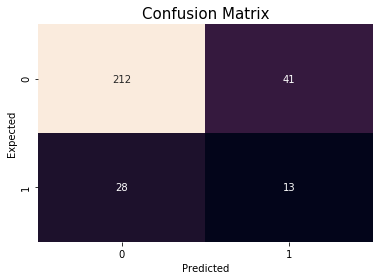

In [79]:
# Confusion Matrix
cm_plot =  pd.crosstab(index=y_test.values.ravel(), columns=y_test_pred, rownames=['Expected'], colnames=['Predicted'])
sns.heatmap(cm_plot, annot=True, square=False, fmt='', cbar=False)
plt.title("Confusion Matrix", fontsize = 15)
plt.show()

### Cross Validation Setup

In [80]:
# Cross Validate
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

### GridSearch CV Decision Tree

In [81]:
# Determine Best Estimator
params = dict(
    min_samples_split = [5, 10, 20, 30, 40, 50],
    max_depth = [1,2,3,None],
    ccp_alpha = [0.0, 0.010, 0.015, 0.020, 0.025]
)

# best_estimator = GridSearchCV(lr_clf, params,cv=10)
best_estimator = gridSearcBestEstimator(DecisionTreeClassifier(), params, cv)

# # Fit Model to best_estimator
dt_clf = fitModel(best_estimator)

# Calcualate Training and Testing Accuracy
y_test_pred = modelAccuracy(dt_clf)

# Print Confusion Matrix
cm = confusionMatrix(y_test, y_test_pred)

# Print Metrics
metrics(cm, y_test, y_test_pred)

Best Estimator:
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') 

Training Accuracy:  0.8460884353741497
Testing Accuracy:   0.8367346938775511

                  Predicted Negative  Predicted Positive
Actual Negative                 234                  19
Actual Positive                  29                  12

Recall:                   0.2926829268292683
Specificity:              0.924901185770751
Precision:                0.3870967741935484
Balanced Accuracy:        0.6087920563000097
F1-Score:                 0.3333333333333333


### Confusion Matrix for Best Estimator with selected features

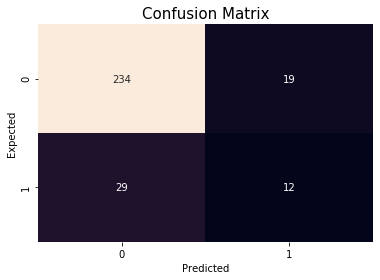

In [82]:
# Confusion Matrix
cm_plot =  pd.crosstab(index=y_test.values.ravel(), columns=y_test_pred, rownames=['Expected'], colnames=['Predicted'])
sns.heatmap(cm_plot, annot=True, square=False, fmt='', cbar=False)
plt.title("Confusion Matrix", fontsize = 15)
plt.show()

### Visualize best estimator

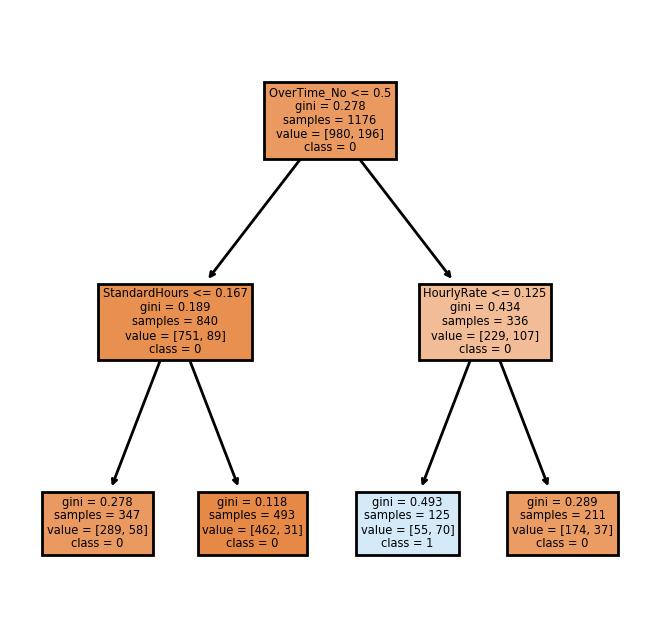

In [83]:
#Visualize decision tree
hr_employee_df = pd.DataFrame(data=hr_employee)
fn=hr_employee_df.columns
cn=['0','1']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=200)
tree.plot_tree(best_estimator,
               feature_names = fn, 
               class_names=cn,
               filled = True);

### Observations
The base decision tree model with selected features overfit the training data with default parameters. Training accuracy was 100% and testing accuracy was 75%. Through grid search, the model reduced bias on the model and improved overall performance. The best model chosen performed at training accuracy of 87% and testing accuracy of 84%.

Overall, the model with selected features performed with higher accuracy than the base model. In addition to performing better, we can get insights from the model about actions the Company can take in order to reduce attrition. 

From our decision tree, we see that overtime is the primary factor that is affecting predicitons of attrition. overtime > .5, as well as hourly rate <= 0.125 (normalized) are the highest predictors of employee attrition. The Company could take action surrouding these insights. For example, I recommend IBM reduces overall overtime requirements, or, if it is unavoidable, paying better for employees that have to do overtime. 

Surprisingly, years since last promotion, salary, business travel, and training time does not influence strongly whether or not an employee leaves. This is also good information to know, as IBM could focus more on paying better for overtime than offering trainings.